In [5]:
!pip install torch_geometric

In [36]:
!pip install matplotlib-venn

In [37]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [38]:
!pip install cartopy
import cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 22.9 MB/s eta 0:00:00


In [42]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [3]:
!pip install torch_scatter torch_sparse torch_cluster torch_spline_conv -f https://data.pyg.org/whl/torch-2.2.0+cpu.html

Looking in links: https://data.pyg.org/whl/torch-2.2.0+cpu.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 508.1/508.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 770.0/770.0 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.9/213.9 kB 21.8 MB/s eta 0:00:00


In [8]:
!pip install --upgrade scipy networkx

In [9]:

import networkx as nx

In [10]:

G = nx.Graph()
print('G grafı yönlü mü',G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print('H garfı yönlü mü',H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

H.graph["Features"] = "PNG"
print(H.graph)

G grafı yönlü mü False
H garfı yönlü mü True
{'Name': 'Bar'}
{'Features': 'PNG'}


In [11]:
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

def visualize(h, color, epoch=None, loss=None, accuracy=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None and accuracy['train'] is not None and accuracy['val'] is not None:
            plt.xlabel((f'Epoch: {epoch}, Loss: {loss.item():.4f} \n'
                       f'Training Accuracy: {accuracy["train"]*100:.2f}% \n'
                       f' Validation Accuracy: {accuracy["val"]*100:.2f}%'),
                       fontsize=16)
    else:
        nx.draw_networkx(h, pos=nx.spring_layout(h, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

In [12]:
from torch_geometric.datasets import Amazon
from torch_geometric.data import DataLoader

dataset = Amazon(root="data/Amazon", name="Photo")
print(f'Dataset: {dataset}:')
print('======================')


print(f'Graf sayısı: {len(dataset)}')
print(f'Özellik sayısı: {dataset.num_features}')
print(f'Sınıf sayısı: {dataset.num_classes}')


Processing...


Dataset: AmazonPhoto():
Graf sayısı: 1
Özellik sayısı: 745
Sınıf sayısı: 8


Done!


In [34]:


data = dataset[0]



print(data)
print('==============================================================')

print(f'Düğüm sayısı: {data.num_nodes}')
print(f'Kenar sayısı: {data.num_edges}')
print(f'Düğüm ortalama derecesi: {(data.num_edges) / data.num_nodes:.2f}')
# print(f'Eğitimde kullanılacak düğüm sayısı: {data.train_mask.sum()}')
# print(f'Ne kadar eğitimde düğüm: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Ayrık düğüm sayısı: {data.has_isolated_nodes()}')
print(f'Döngü içeren düğüm: {data.has_self_loops()}')
print(f'Yönsüz grafı mı?: {data.is_undirected()}')

Data(x=[7650, 745], edge_index=[2, 238162], y=[7650])
Düğüm sayısı: 7650
Kenar sayısı: 238162
Düğüm ortalama derecesi: 31.13
Ayrık düğüm sayısı: True
Döngü içeren düğüm: False
Yönsüz grafı mı?: True


In [15]:
data.edge_index.T

tensor([[   0, 1210],
        [   0, 2198],
        [   0, 2239],
        ...,
        [7649, 2239],
        [7649, 3295],
        [7649, 4196]])

In [16]:
print(data)

Data(x=[7650, 745], edge_index=[2, 238162], y=[7650])


In [17]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[   0, 1210],
        [   0, 2198],
        [   0, 2239],
        ...,
        [7649, 2239],
        [7649, 3295],
        [7649, 4196]])


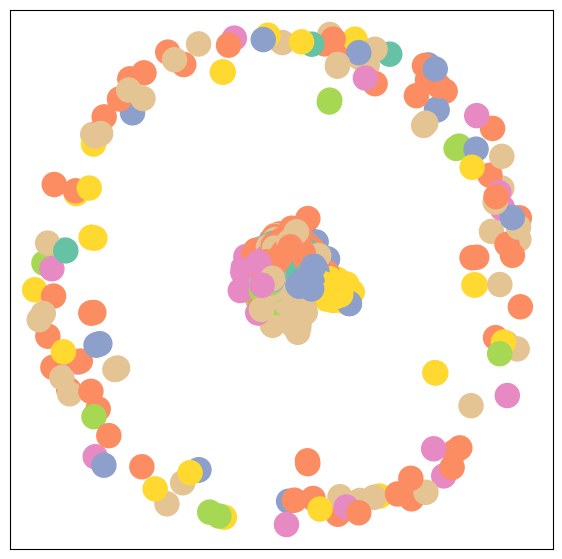

In [18]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

In [19]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv

# GCN (Graph Convolutional Network) sınıfını tanımlıyoruz.
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)  # Rastgele sayı üreteçlerinin sabit bir duruma getirilmesi için seed ayarlanıyor.

        # İlk katmanın oluşturulması: Girdi özellik sayısı (dataset.num_features) ile çıkış özellik sayısı (4) arasında bir dönüşüm gerçekleştirir.
        self.conv1 = GCNConv(dataset.num_features, 4)

        # İkinci katmanın oluşturulması: Girdi özellik sayısı (4) ile çıkış özellik sayısı (4) arasında bir dönüşüm gerçekleştirir.
        self.conv2 = GCNConv(4, 4)

        # Üçüncü katmanın oluşturulması: Girdi özellik sayısı (4) ile çıkış özellik sayısı (2) arasında bir dönüşüm gerçekleştirir.
        self.conv3 = GCNConv(4, 2)

        # Sınıflandırıcı katmanın oluşturulması: İki özellikten (GCN çıktısı) sınıf sayısına kadar bir dönüşüm gerçekleştirir.
        self.classifier = Linear(2, dataset.num_classes)

    # İleri geçiş işlemi tanımlanıyor.
    def forward(self, x, edge_index):
        # İlk GCN katmanı ve aktivasyon fonksiyonu (tanh) uygulanıyor.
        h = self.conv1(x, edge_index)
        h = h.tanh()

        # İkinci GCN katmanı ve aktivasyon fonksiyonu (tanh) uygulanıyor.
        h = self.conv2(h, edge_index)
        h = h.tanh()

        # Üçüncü GCN katmanı ve aktivasyon fonksiyonu (tanh) uygulanıyor.
        h = self.conv3(h, edge_index)
        h = h.tanh()

        # Sınıflandırıcıya geçirme işlemi yapılıyor.
        out = self.classifier(h)

        return out, h

# GCN modelinin oluşturulması.
model = GCN()

# Modelin yazdırılması.
print(model)


GCN(
  (conv1): GCNConv(745, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=8, bias=True)
)


Gömme (Embedding) boyutu: [7650, 2]


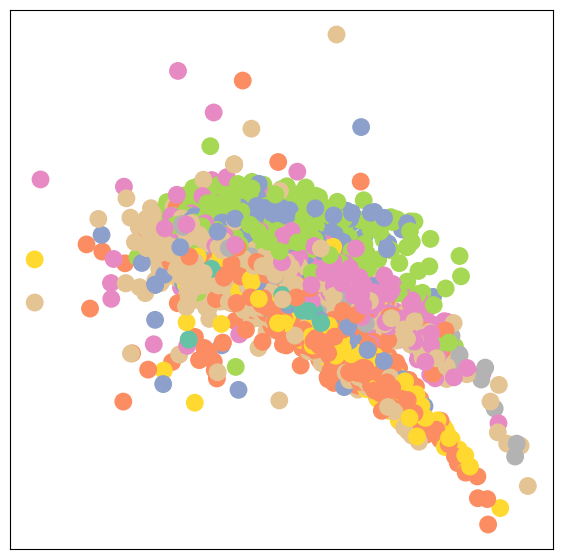

In [20]:
# GCN modelinin oluşturulması
model = GCN()

# Veri üzerinde modelin çalıştırılması ve gömme (embedding) vektörlerinin elde edilmesi
_, h = model(data.x, data.edge_index)

# Elde edilen gömme vektörlerinin boyutunun yazdırılması
print(f'Gömme (Embedding) boyutu: {list(h.shape)}')

# Gömme vektörlerinin görselleştirilmesi için bir fonksiyonun çağrılması
visualize(h, color=data.y)


<IPython.core.display.Javascript object>

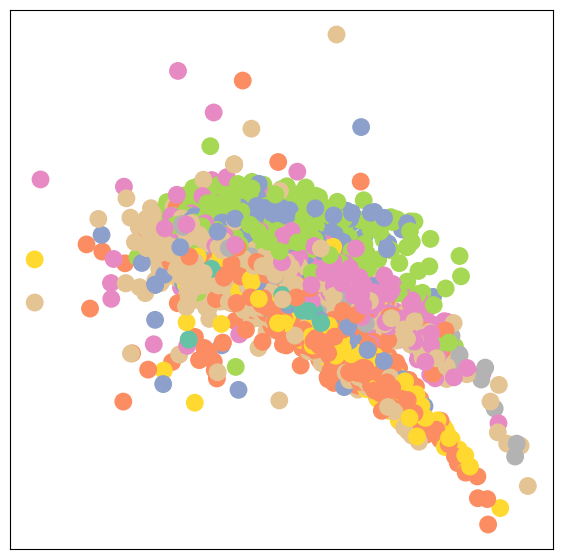

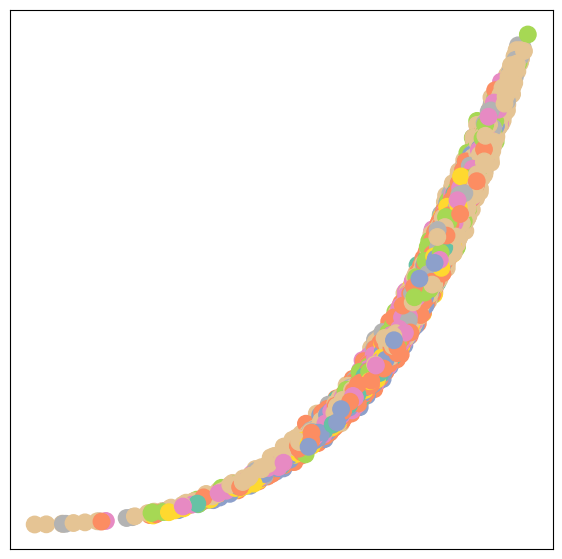

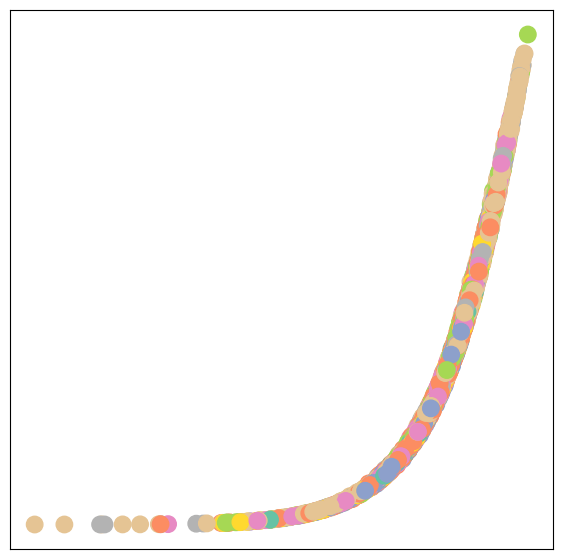

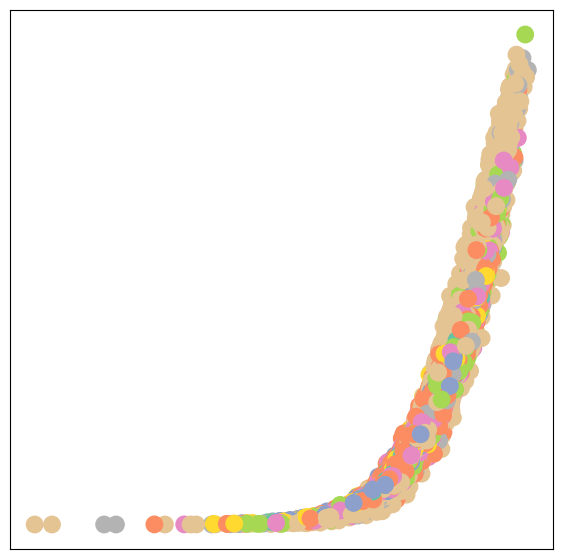

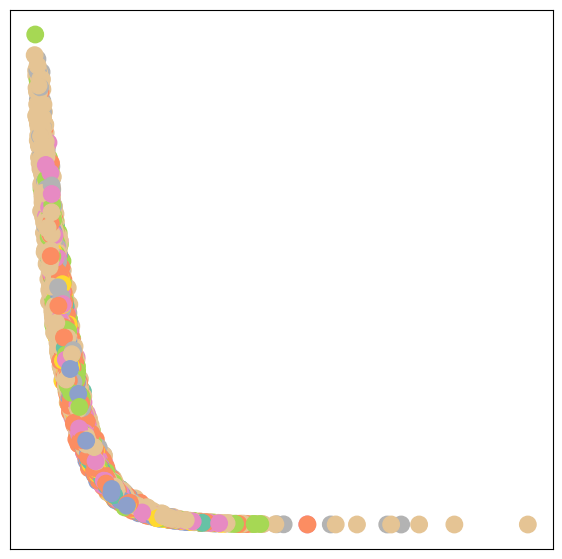

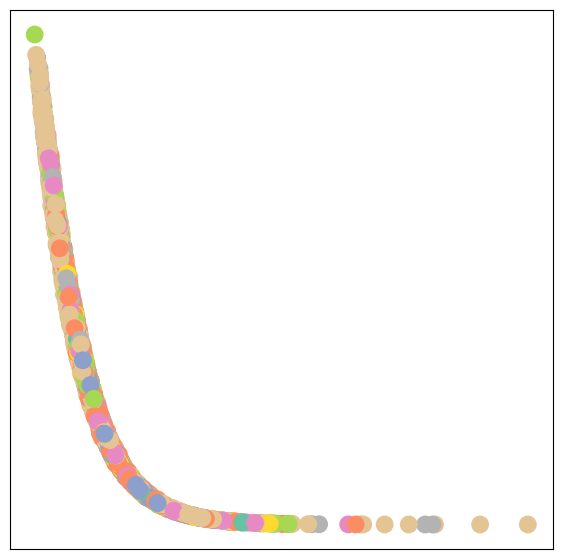

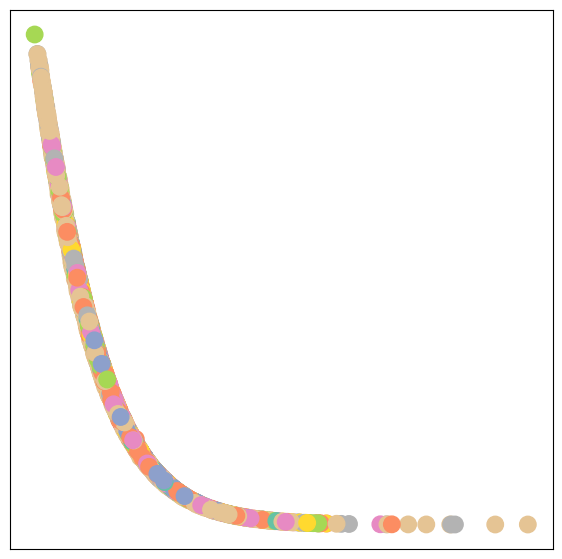

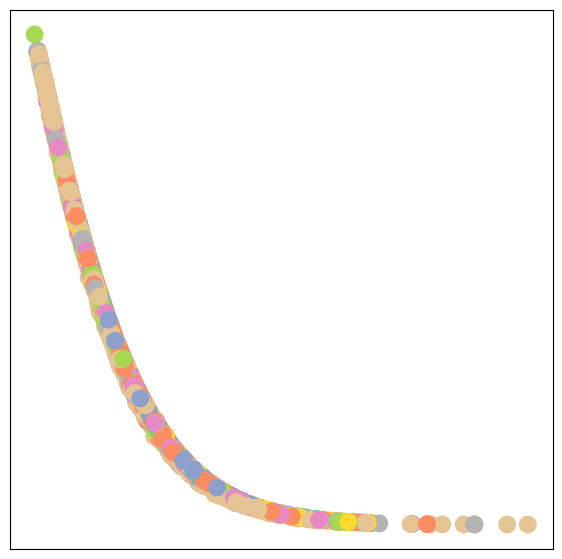

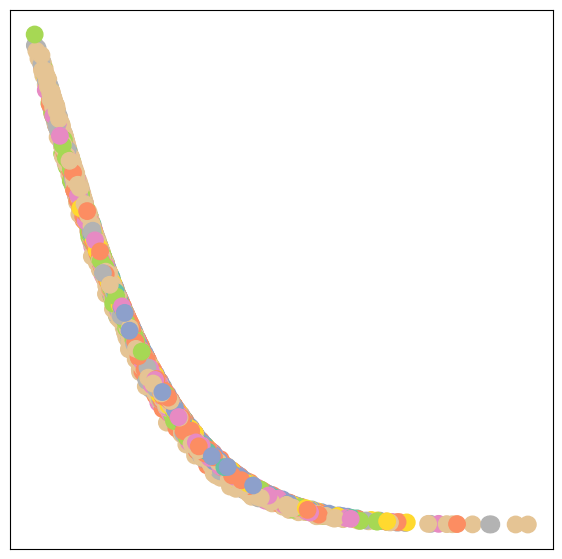

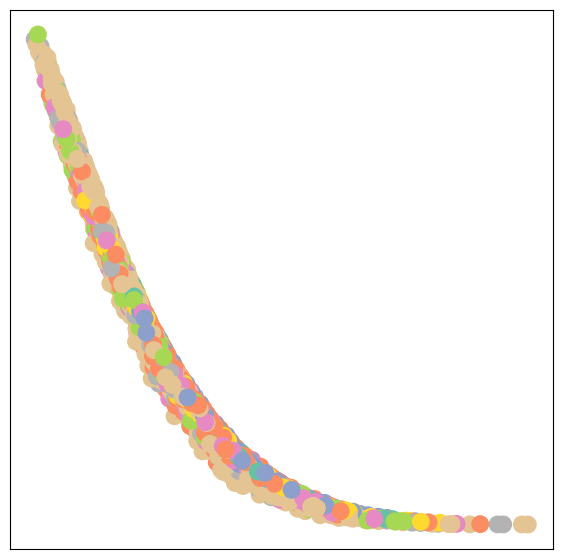

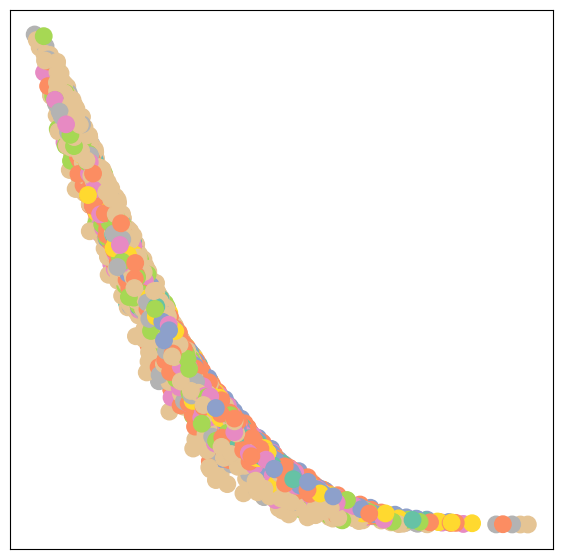

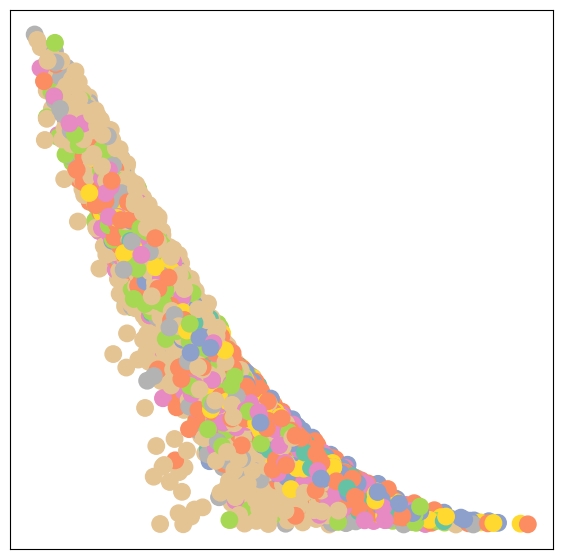

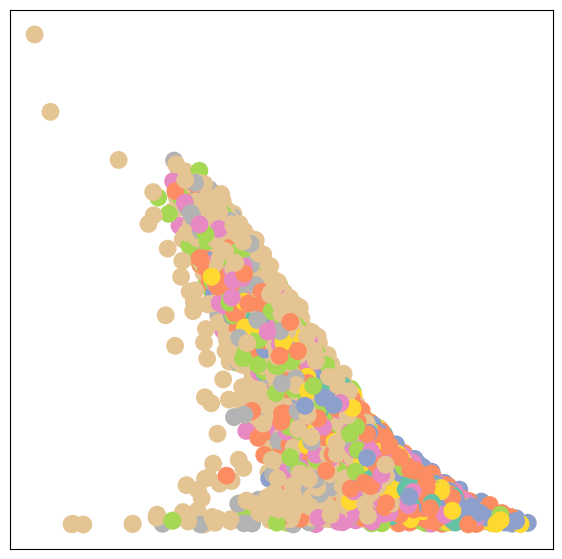

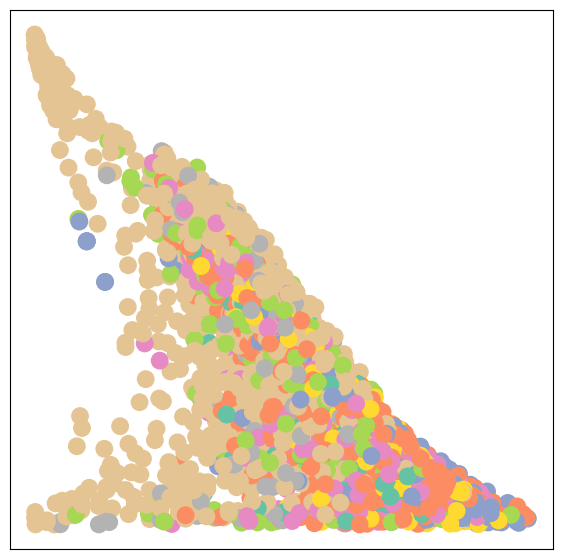

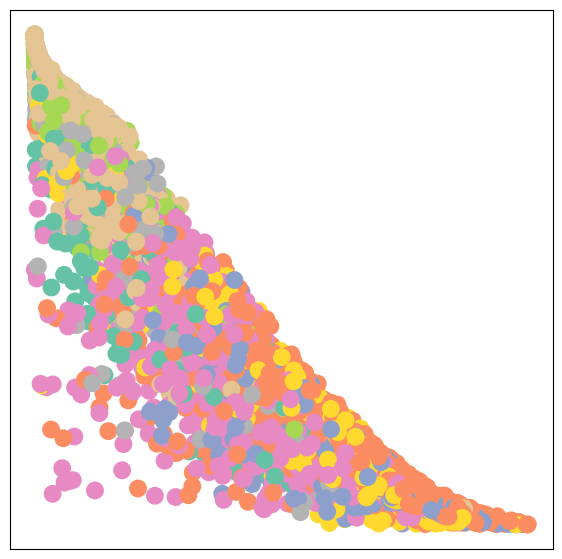

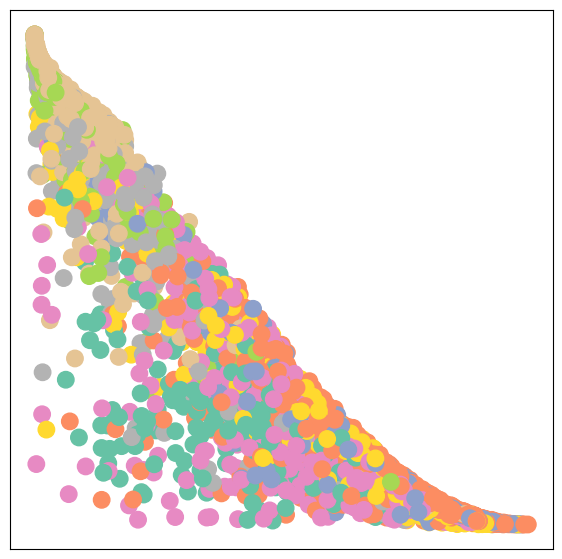

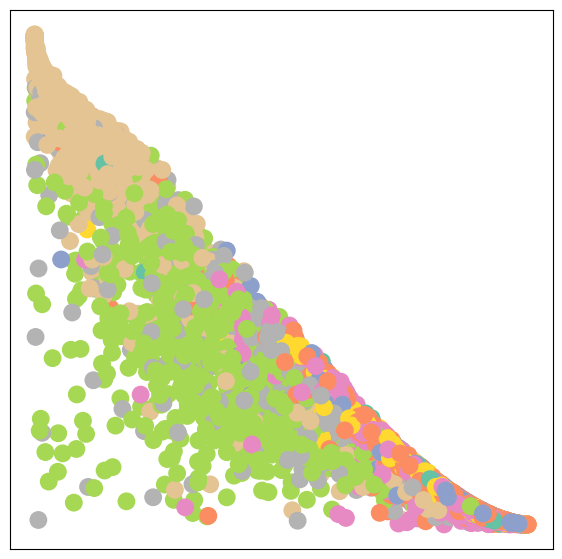

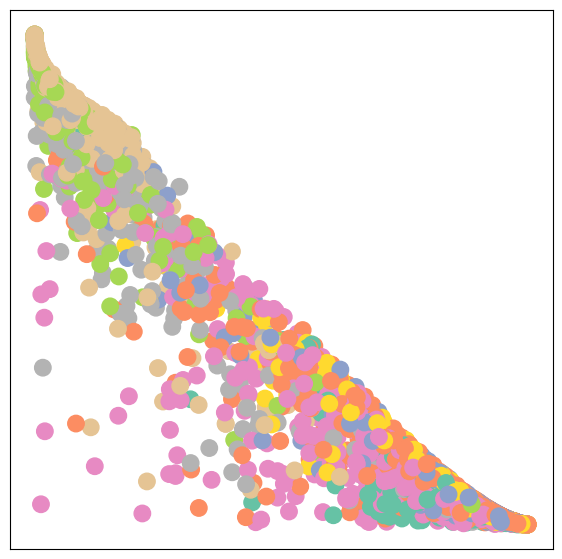

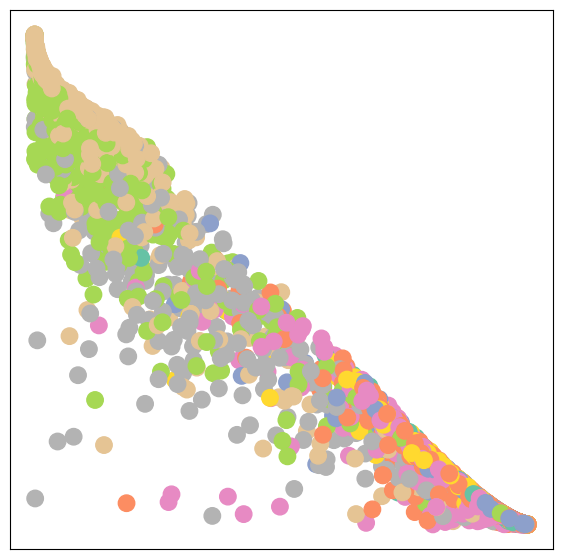

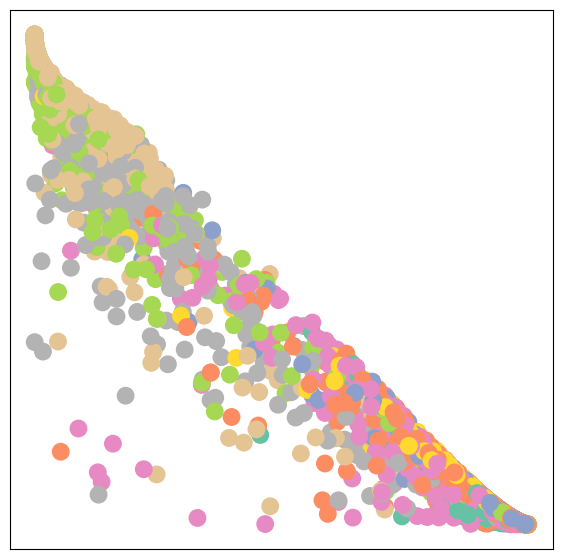

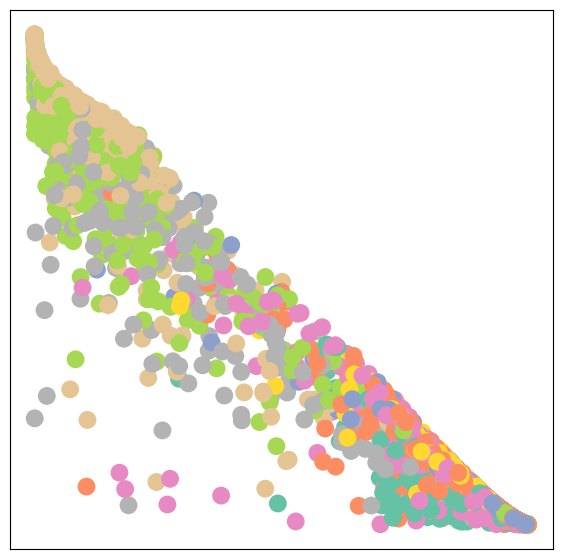

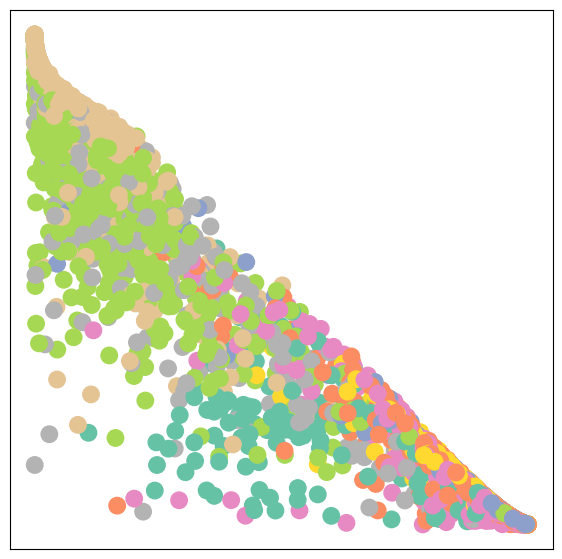

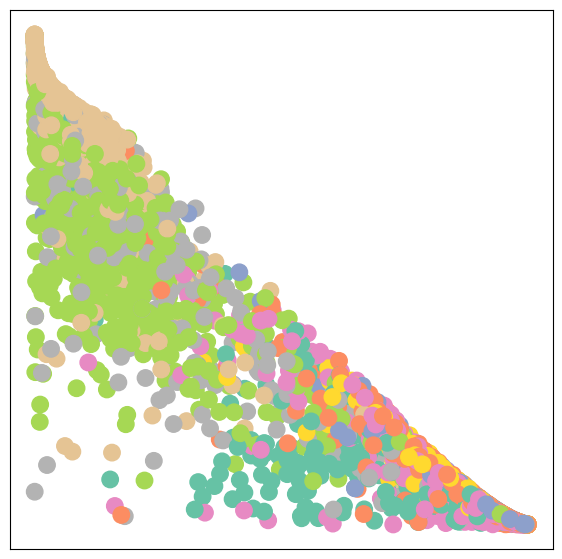

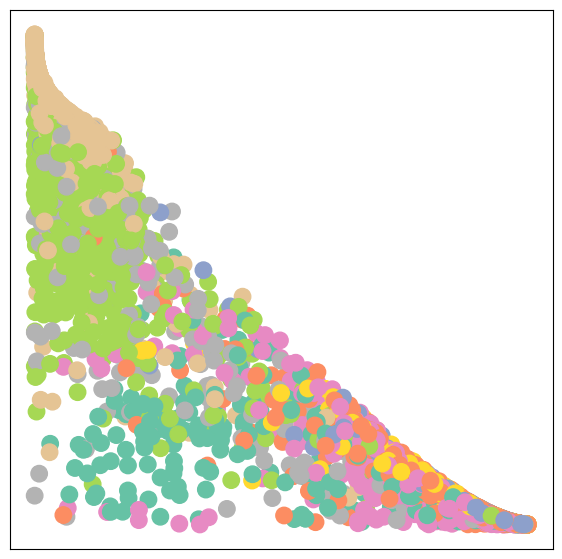

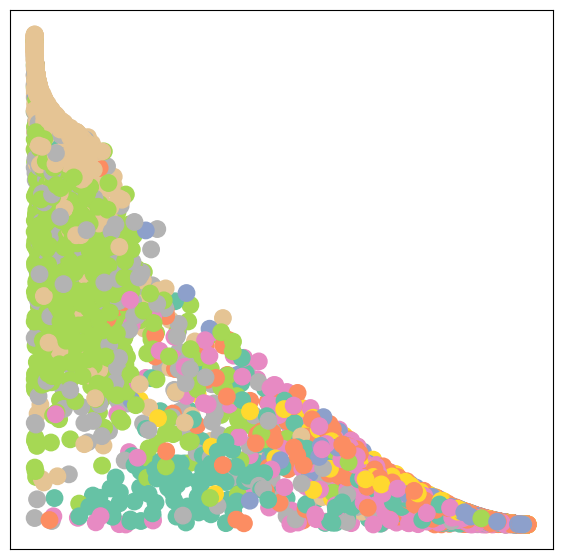

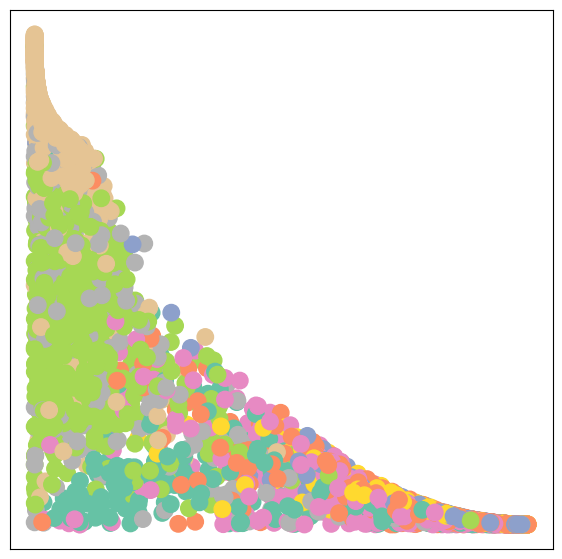

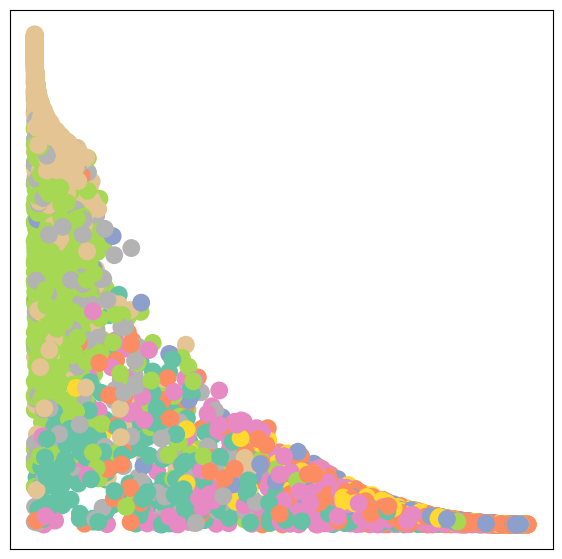

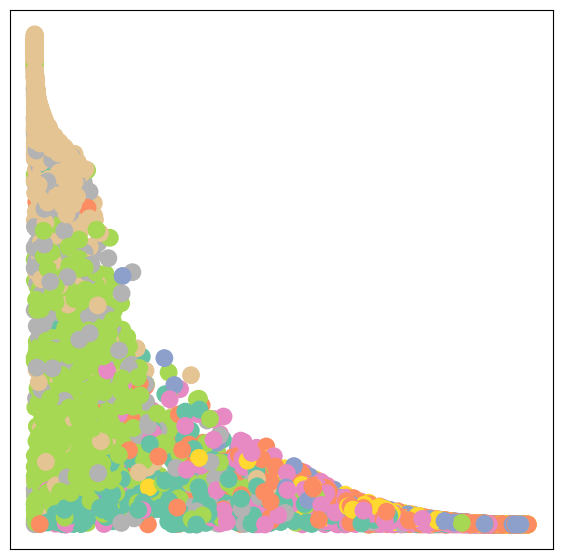

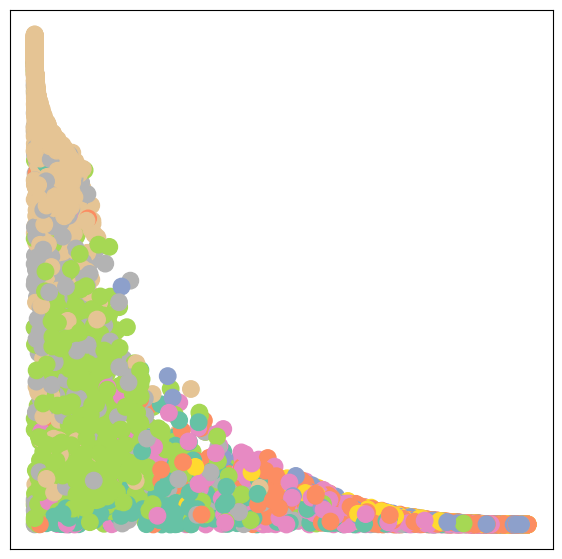

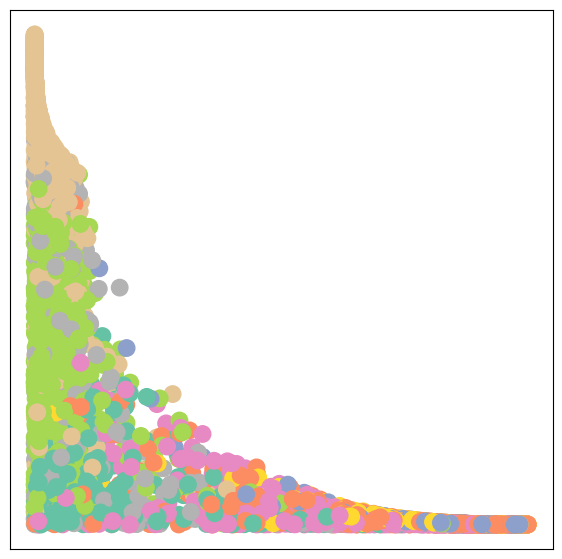

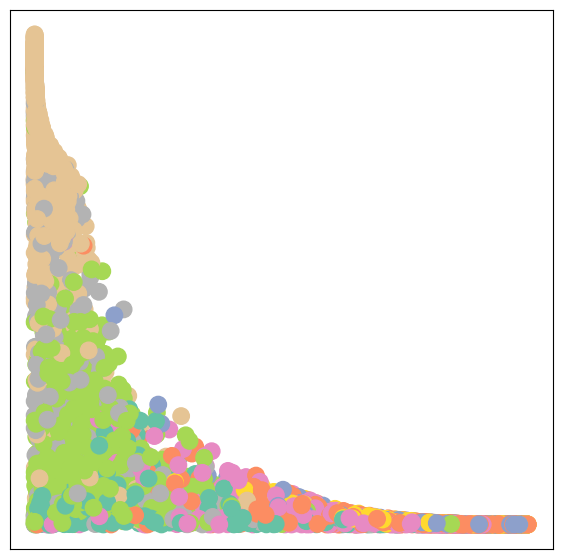

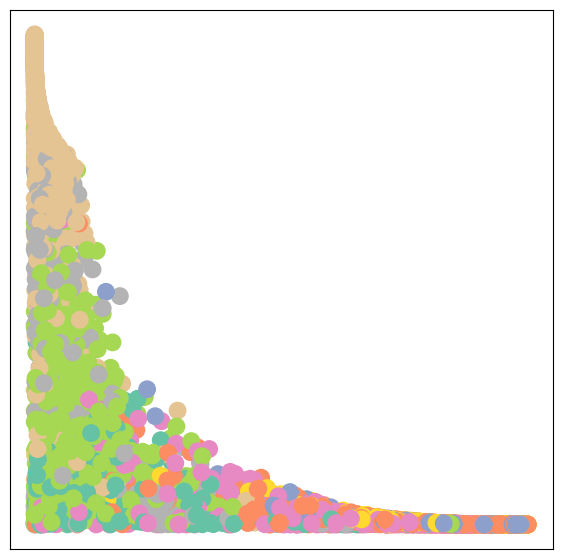

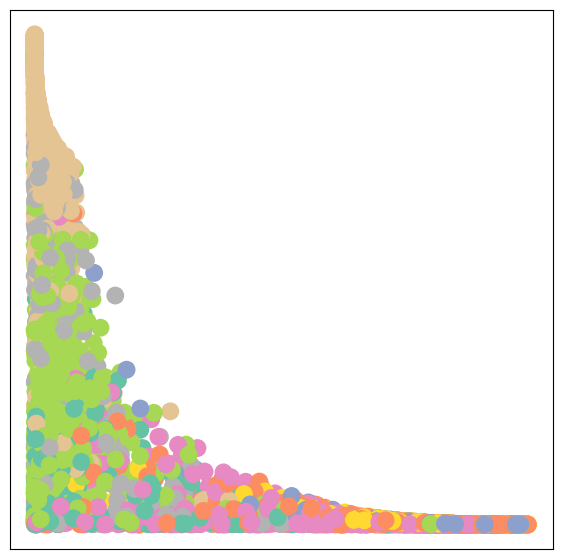

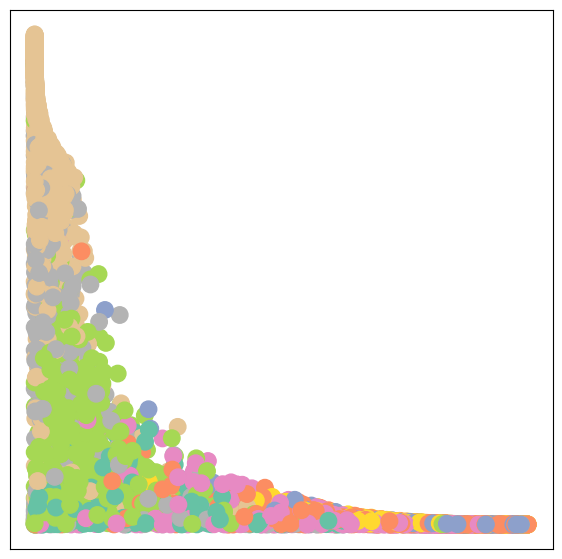

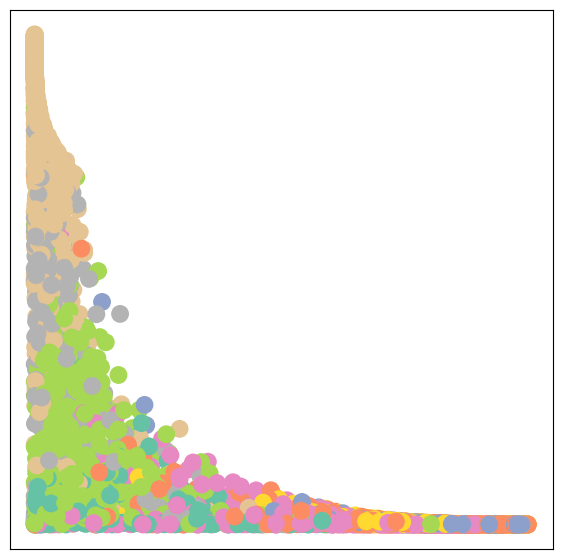

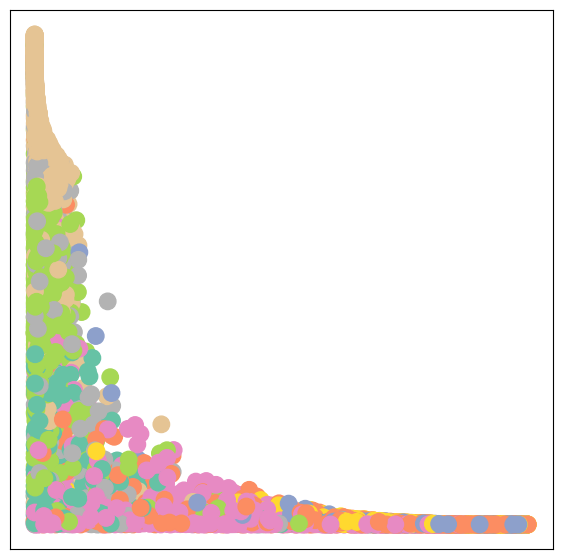

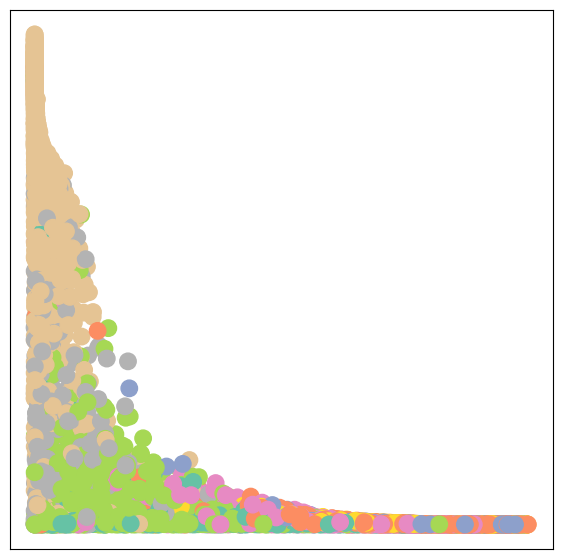

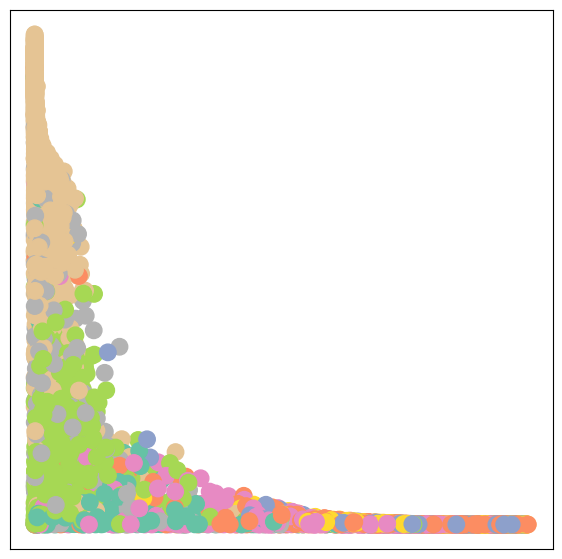

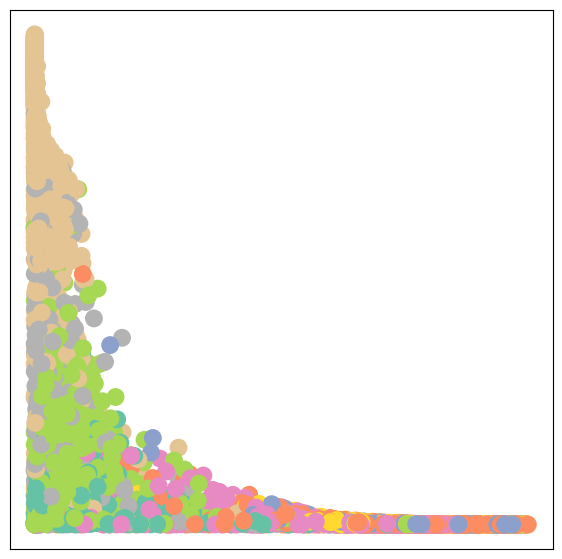

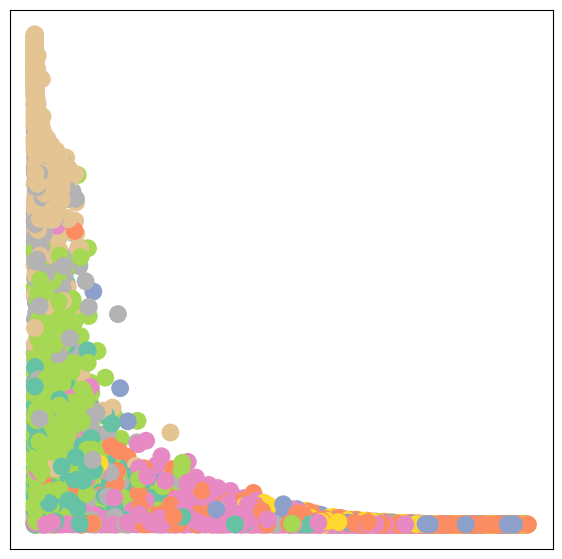

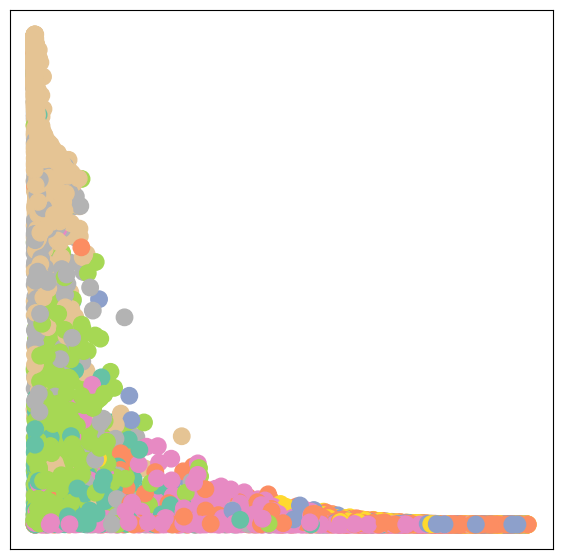

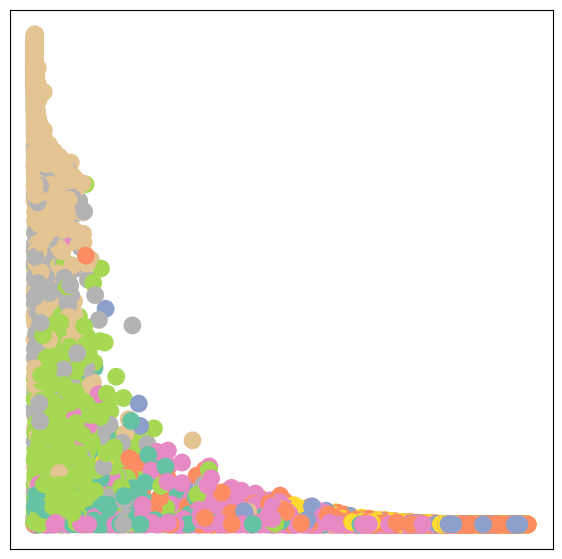

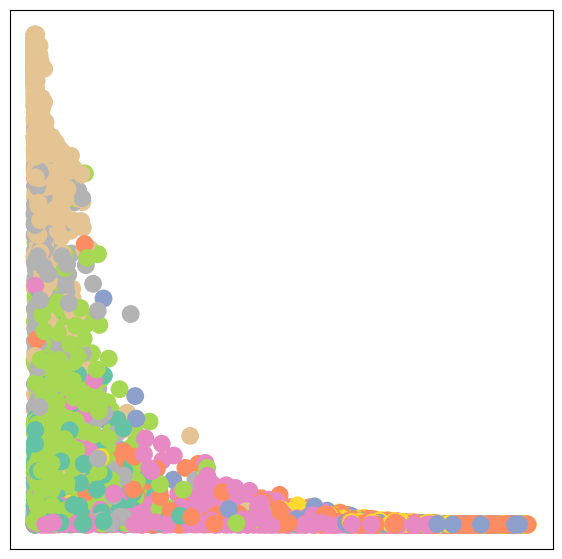

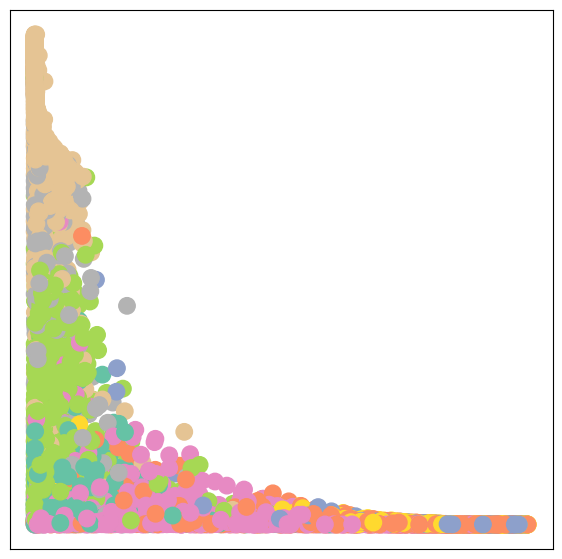

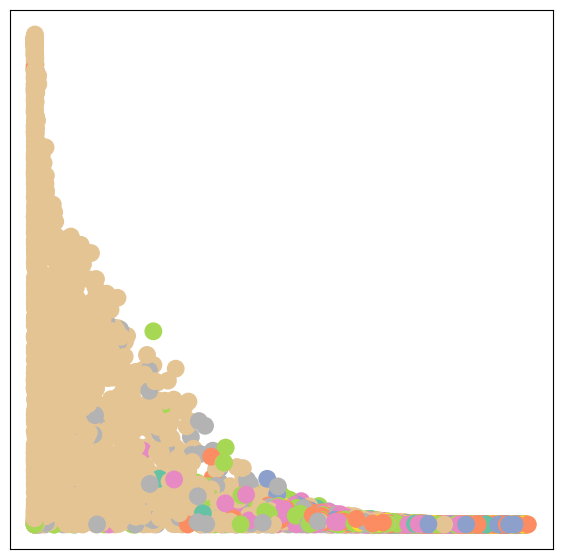

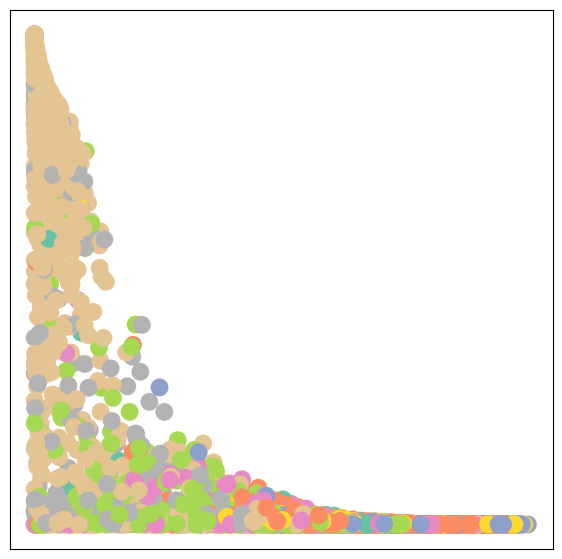

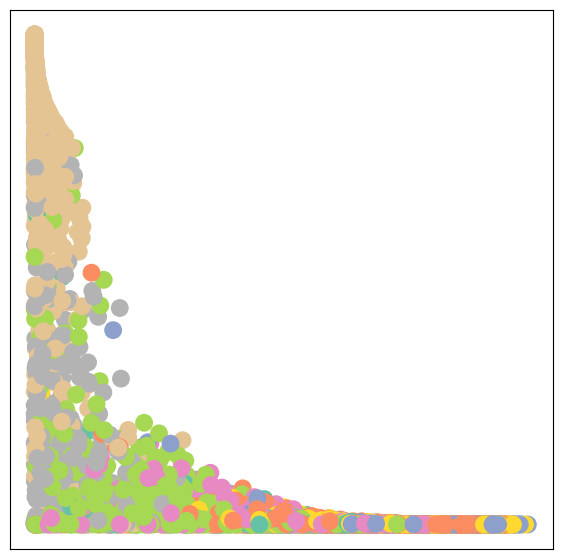

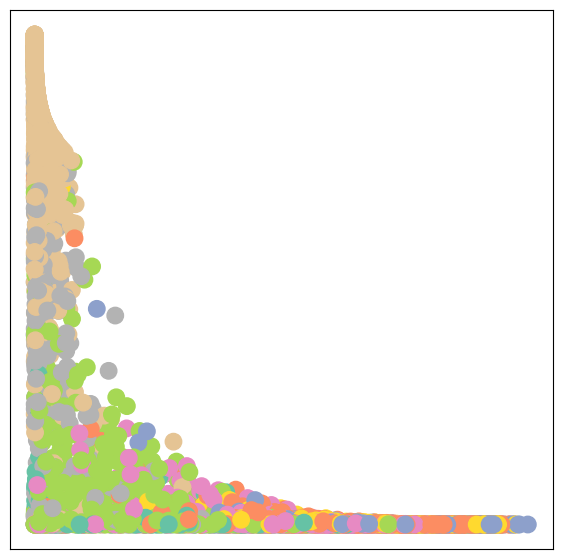

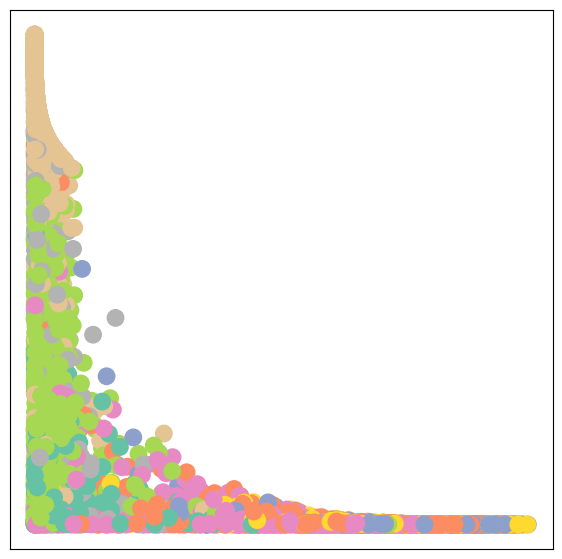

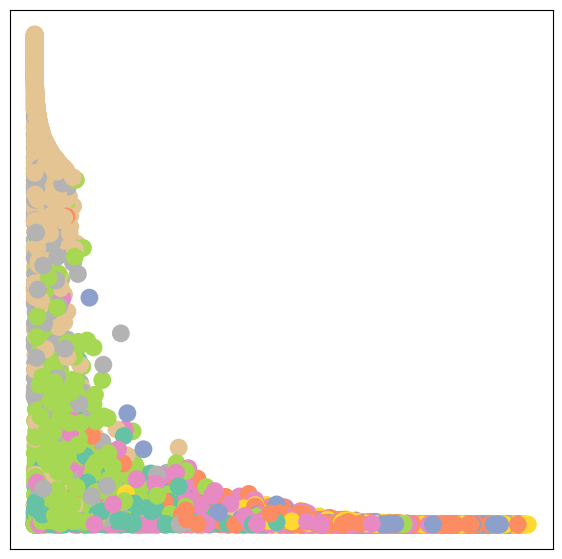

In [47]:
import time
from IPython.display import Javascript  # Çıktı hücresinin yüksekliğini sınırla.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()  # Modeli tanımla.
criterion = torch.nn.CrossEntropyLoss()  # Kayıp fonksiyonunu tanımla.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Optimizer'ı tanımla.

def train(data):
    optimizer.zero_grad()  # Gradyanları temizle.
    out, h = model(data.x, data.edge_index)  # Tek bir ileri geçişi gerçekleştir.
    loss = criterion(out, data.y)  # Tüm düğümler için kaybı hesapla.
    loss.backward()  # Gradyanları türet.
    optimizer.step()  # Gradyanlara dayanarak parametreleri güncelle.

    accuracy = {}
    # Tüm graf üzerinde eğitim doğruluğunu hesapla
    predicted_classes = torch.argmax(out, axis=1)
    target_classes = data.y
    accuracy['train'] = torch.mean(
        torch.where(predicted_classes == target_classes, 1, 0).float())

    return loss, h, accuracy

for epoch in range(500):
    loss, h, accuracy = train(data)
    # Her 10 epoch'ta düğüm gömülerini görselleştir
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, accuracy=accuracy)
        time.sleep(0.3)
